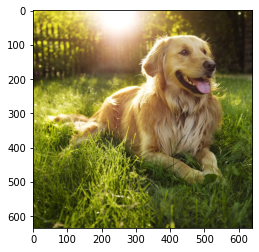

<class 'imageio.core.util.Array'>
hi nat


torch.Size([3, 3, 256, 256])

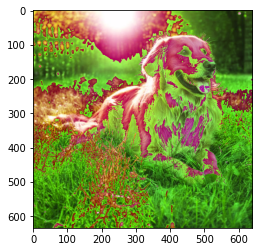

In [136]:
# Chapter 4 of Deep Learning with Pytorch

import torch
import imageio

img_arr = imageio.imread('./cute_dog.jpg')
img_arr.shape

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(img_arr)
plt.show()

print(type(img_arr))

print('hi nat')

img = torch.from_numpy(img_arr)
type(img)
img.data

img[:, :, 1] = img[:, :, 1] * 2
# torch 
out = img.permute(2, 0, 1) # permute requires calling of all dimensions
plt.imshow(img.numpy())

batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

batch.size()

In [137]:
import os

data_dir = '../dlwpt-code/data/p1ch4/image-cats'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
filenames

os.listdir(data_dir)

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]  # Removing channels beyond RGB if exists (could be alpha for transparency)
    batch[i] = img_t

batch = batch.float() # mmm easy processing
batch /= 255.0

In [138]:
n_channels = batch.shape[1]

for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

# we're doing it on a batch here. would be better if there was a
# full dataset to calculate the full average and 

In [139]:
import imageio

dir_path = "../dlwpt-code/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 48/99  (48.595/99  (96.099/99  (100.0%)


(99, 512, 512)

In [140]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape
vol[0, 0, :, :]

tensor([[ -985.,  -990.,  -999.,  ..., -1017., -1008.,  -971.],
        [-1016.,  -984.,  -963.,  ..., -1000., -1009.,  -999.],
        [-1024., -1008.,  -996.,  ...,  -979., -1021.,  -987.],
        ...,
        [ -920.,  -942.,  -944.,  ...,  -893.,  -917.,  -955.],
        [ -871.,  -879.,  -905.,  ...,  -895.,  -869.,  -867.],
        [ -876.,  -855.,  -873.,  ...,  -933.,  -982.,  -936.]])

In [141]:
import csv
import numpy as np
wine_path = "../dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [142]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))

wineq_numpy.shape, col_list, len(col_list)

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 12)

In [143]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [144]:
data = wineq[:, :-1]
data, data.shape
target = wineq[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [145]:
target_onehot = torch.zeros(target.shape[0], 10)
target = target.to(dtype=torch.long)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [146]:
b = torch.zeros(5,7)
c = torch.Tensor([3,5,6,1,1]).to(dtype=torch.int64).unsqueeze_(1)
b.scatter_(1, c, 1.0)

tensor([[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.]])

In [147]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [148]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [149]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
id(data.storage()) == id(data_normalized.storage()) # interesting! they don't return the same numbers but same id?
#data.storage()[:10], data_normalized.storage()[:10]


True

In [150]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [151]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [152]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)] 
good_data = data[target <= 7]
# note the & for elementwise and
# this is overriding & and | for numpy and torch which are originally binary funcs
# they also implemented intersection and union for sets

mid_data.size()
bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

'{} {:4}'.format('get', 'out')

 0 fixed acidity          7.60   6.89   6.86
 1 volatile acidity       0.33   0.28   0.28
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   6.42
 4 chlorides              0.05   0.05   0.05
 5 free sulfur dioxide   53.33  35.42  35.26
 6 total sulfur dioxide 170.60 141.83 138.84
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.19
 9 sulphates              0.47   0.49   0.49
10 alcohol               10.34  10.26  10.47


'get out '

In [153]:
total_sulfur_threshold = 141.84
total_sulfur_data = data[:, 6]
predicted_indexes = total_sulfur_data < total_sulfur_threshold
print(torch.equal(predicted_indexes, torch.lt(total_sulfur_data, total_sulfur_threshold)))
predicted_indexes, predicted_indexes.sum(), predicted_indexes.dtype

True


(tensor([False,  True,  True,  ...,  True,  True,  True]),
 tensor(2727),
 torch.bool)

In [154]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [155]:
n_matches = torch.sum(actual_indexes & predicted_indexes)

n_matches, n_matches.item()

(tensor(2018), 2018)

In [156]:
n_matches = n_matches.item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches/n_actual, 

(2018, 0.74000733406674, 0.6193984039287906)

In [157]:
n = actual_indexes.shape[0]
n_matches_all = torch.sum(actual_indexes == predicted_indexes)
n_matches_all / n

tensor(0.6021)

In [158]:
bikes_numpy = np.loadtxt(
    '../dlwpt-code/data/p1ch4/bike-sharing-dataset/hour-fixed.csv',
    dtype=np.float32,
    delimiter=",",
    skiprows=1,
    converters={1: lambda x: float(x[8:10])}) # in column 1, convert date string to float of chars 8:10

bikes = torch.from_numpy(bikes_numpy)
bikes[-1, 0], bikes.shape

(tensor(17379.), torch.Size([17520, 17]))

In [159]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride(), bikes.dtype

(torch.Size([730, 17, 24]), (408, 1, 17), torch.float32)

In [160]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
set(bikes[:, 9].numpy())

{1.0, 2.0, 3.0, 4.0}

In [161]:
weather_onehot.scatter_(
    dim=1,
    index=first_day[:, 9].unsqueeze_(1) - 1,
    value=1.0
)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [162]:
torch.cat((bikes[:24], weather_onehot), dim=1)[:1] #concatenation


tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [163]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
                                   daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [164]:
daily_weather_onehot.scatter_(
    dim=1,
    index=daily_bikes[:, 9, :].to(torch.long).unsqueeze_(1) - 1,
    value = 1.0
)
daily_weather_onehot.shape
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.) / 3.0

In [167]:
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = (temp - temp_min) / (temp_max - temp_min)
daily_bikes[:, 10, :]

tensor([[0.2245, 0.2041, 0.2041,  ..., 0.3878, 0.3878, 0.4490],
        [0.4490, 0.4286, 0.4082,  ..., 0.2449, 0.2245, 0.2041],
        [0.2041, 0.1837, 0.1837,  ..., 0.1633, 0.1224, 0.1633],
        ...,
        [0.2245, 0.2245, 0.2245,  ..., 0.2653, 0.2449, 0.2449],
        [0.2449, 0.2449, 0.2449,  ..., 0.1837, 0.1837, 0.1837],
        [0.1633, 0.1633, 0.1429,  ..., 0.2449, 0.2449, 0.2449]])

In [173]:
# or, using standard dev
temp = daily_bikes[:, 10, :]
temp_mean = temp.mean()
temp_std = temp.std()
daily_bikes[:, 10, :] = (temp - temp_mean) / temp_std




In [192]:
with open('../dlwpt-code/data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()
    
lines = text.split('\n')
line = lines[200]

In [193]:
letter_t = torch.zeros(len(line), 128)
letter_t.shape


torch.Size([70, 128])

In [194]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i, letter_index] = 1.0
    

In [197]:
torch.sum(letter_t, dim = 0)

tensor([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
         3.,  1.,  1.,  6.,  0.,  0.,  3.,  8.,  0.,  0.,  2.,  5.,  5.,  3.,
         2.,  1.,  1.,  4.,  4.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.])

In [204]:
def clean_words(input_str):
    punctuation = '.,;:"!?\'_-()”“/'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [206]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7171, 3332)

In [208]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i, word_index] = 1.0
    print('{:2} {:4} {}'.format(i, word_index, word))
    
    
word_t, inde

 0 3332 impossible
 1 4231 mr
 2  764 bennet
 3 3332 impossible
 4 6992 when
 5 3253 i
 6  370 am
 7 4359 not
 8  194 acquainted
 9 7060 with
10 3154 him


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])